# 004 PCA & Clustering With Python

* Written by Alexandre Gazagnes
* Last update: 2024-02-01

## About 

Context : 

You're an export project manager for a major food manufacturer. You are in charge of poultry departement.
You have been asked to identify segments of countries within the company's database in order to target them with personalized marketing campaigns.

Data  : 

After a quick look on the internet, you find a very interesting dataset on the FAO website. It contains a list of countries with various indicators. You decide to use this dataset to identify segments of countries.

You can download the "raw" dataset [here](https://www.fao.org/faostat/fr/#data/QCL).

**You can also use a preprocessed version of the dataset [here](https://gist.githubusercontent.com/AlexandreGazagnes/7cc1176dfe0e281c45e0119210187ae2/raw/4e5c4caac35b88fcedea810f470957b7c5f9b5af/chicken_cleaned.csv).**

Mission :

Your objective is to

- Take a quick tour of the data to understand the data set 

- Clean up the dataset if necessary 

- Perform clustering with Kmeans and Agglomerative Clustering, focusing on countries with large potential markets: populous countries, wealthy countries and/or countries with high import levels

- You need to be able to understand and explain the clusters you've created.

## Preliminaries

### System

These commands will display the system information:

Uncomment theses lines if needed. 

In [2]:
# pwd

In [3]:
# cd ..

In [4]:
# ls

In [5]:
# cd ..

In [6]:
# ls

These commands will install the required packages:

In [7]:
# !pip install pandas matplotlib seaborn plotly scikit-learn

This command will download the dataset:

In [8]:
# !wget https://gist.githubusercontent.com/AlexandreGazagnes/7cc1176dfe0e281c45e0119210187ae2/raw/4e5c4caac35b88fcedea810f470957b7c5f9b5af/chicken_cleaned.csv

### Import 

Import data libraries:

In [9]:
import pandas as pd
import numpy as np

Import Graphical libraries:

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Import Machine Learning libraries:

In [11]:
# must to have (mandarory)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# nice to have
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

### Get the data

1st option : Download the dataset from the web

In [12]:
url = "https://gist.githubusercontent.com/AlexandreGazagnes/7cc1176dfe0e281c45e0119210187ae2/raw/4e5c4caac35b88fcedea810f470957b7c5f9b5af/chicken_cleaned.csv"
df = pd.read_csv(url)
df.head()

,zone,dispo_int,import,dispo_alim,population,dependence,delta
0,Afghanistan,57.0,29.0,5.0,36296000,0.508772,29.0
1,Algérie,277.0,2.0,22.0,41389000,0.007220,2.0
2,Angola,319.0,277.0,35.0,29816000,0.868339,277.0
3,Argentine,1962.0,8.0,182.0,43937000,0.004077,-199.0
4,Australie,1171.0,16.0,192.0,24584000,0.013664,-26.0


2nd Option : Read data from a file

In [13]:
# or

# fn = "./chicken_cleaned.csv"
# df = pd.read_csv(fn)
# df.head()

3rd Option : Load a toy dataset

In [14]:
# or

# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df["Species"] = data.target
# df.head()

## Quick Data Viz

Write a function to display the correlation matrix:

In [15]:
# With a function


def make_corr_heatmap(df):
    corr = df.select_dtypes(include="number").corr()
    mask = np.triu(corr)
    sns.heatmap(
        corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, mask=mask
    )

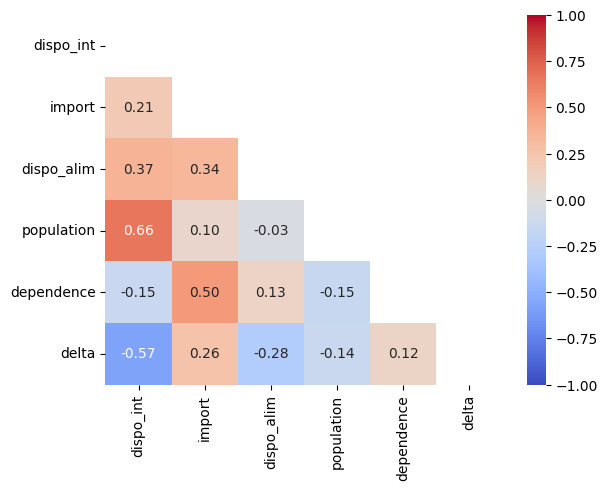

In [16]:
make_corr_heatmap(df)

Make a pairplot of the numerical columns:

This visualization can be slow with large datasets. 
Use VIZ = True / False to enable / disable the visualization.

In [17]:
VIZ = False  # Enable this with True
if VIZ:
    sns.pairplot(df.select_dtypes(exclude="object"), corner=True)

### Scale

In [18]:
df

,zone,dispo_int,import,dispo_alim,population,dependence,delta
0,Afghanistan,57.0,29.0,5.0,36296000,0.508772,29.0
1,Algérie,277.0,2.0,22.0,41389000,0.007220,2.0
2,Angola,319.0,277.0,35.0,29816000,0.868339,277.0
3,Argentine,1962.0,8.0,182.0,43937000,0.004077,-199.0
4,Australie,1171.0,16.0,192.0,24584000,0.013664,-26.0
...,...,...,...,...,...,...,...
104,Yémen,246.0,78.0,30.0,27834000,0.317073,78.0
105,Zambie,60.0,12.0,11.0,16853000,0.200000,11.0
106,Belgique,152.0,338.0,44.0,11419000,2.223684,-318.0
107,Serbie,90.0,12.0,35.0,8829000,0.133333,5.0


Select only numerical columns:

In [19]:
X = df.select_dtypes(include="number")
X

,dispo_int,import,dispo_alim,population,dependence,delta
0,57.0,29.0,5.0,36296000,0.508772,29.0
1,277.0,2.0,22.0,41389000,0.007220,2.0
2,319.0,277.0,35.0,29816000,0.868339,277.0
3,1962.0,8.0,182.0,43937000,0.004077,-199.0
4,1171.0,16.0,192.0,24584000,0.013664,-26.0
...,...,...,...,...,...,...
104,246.0,78.0,30.0,27834000,0.317073,78.0
105,60.0,12.0,11.0,16853000,0.200000,11.0
106,152.0,338.0,44.0,11419000,2.223684,-318.0
107,90.0,12.0,35.0,8829000,0.133333,5.0


Use SciKit Learn to scale the dataset:

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-3.74105331e-01, -4.44496163e-01, -1.09533999e+00,
        -1.59395036e-01,  4.66401926e-01,  1.06225317e-01],
       [-2.91244176e-01, -5.65846090e-01, -7.83850578e-01,
        -1.32269415e-01, -6.22814294e-01,  5.98698737e-02],
       [-2.75425228e-01,  6.70125384e-01, -5.45652793e-01,
        -1.93907902e-01,  1.24727017e+00,  5.32008643e-01],
       [ 3.43396946e-01, -5.38879439e-01,  2.14781446e+00,
        -1.18698615e-01, -6.29639369e-01, -2.85220645e-01],
       [ 4.54734280e-02, -5.02923906e-01,  2.33104353e+00,
        -2.21773846e-01, -6.08821385e-01,  1.17975626e-02],
       [-3.30414904e-01, -8.04463835e-02,  4.03440143e-03,
        -3.05739175e-01,  7.42350716e-01,  1.11375921e-01],
       [-3.01413499e-01, -5.74834973e-01, -1.05869417e+00,
         4.97782125e-01, -6.38494386e-01,  5.64361372e-02],
       [-2.33994650e-01, -5.70340532e-01,  1.65309599e+00,
        -2.93100435e-01, -6.33432165e-01,  5.64361372e-02],
       [ 3.36406270e+00, -5.61351648e-01,  2.550

Rebuild a DataFrame with the scaled data:

In [21]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,dispo_int,import,dispo_alim,population,dependence,delta
0,-0.374105,-0.444496,-1.095340,-0.159395,0.466402,0.106225
1,-0.291244,-0.565846,-0.783851,-0.132269,-0.622814,0.059870
2,-0.275425,0.670125,-0.545653,-0.193908,1.247270,0.532009
3,0.343397,-0.538879,2.147814,-0.118699,-0.629639,-0.285221
4,0.045473,-0.502924,2.331044,-0.221774,-0.608821,0.011798


Check that data were scaled:

In [22]:
X_scaled.describe().round(2)

,dispo_int,import,dispo_alim,population,dependence,delta
count,109.00,109.00,109.00,109.00,109.00,109.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.39,-0.57,-1.19,-0.33,-0.64,-7.19
25%,-0.36,-0.57,-0.89,-0.30,-0.62,0.06
50%,-0.30,-0.45,-0.11,-0.24,-0.35,0.07
75%,0.05,0.00,0.55,-0.09,0.19,0.16
max,6.48,4.23,3.10,7.22,6.40,1.87


Of course you can compute the scaling manually:

In [23]:
X_scaled = (X - X.mean()) / X.std()
X_scaled.head()

,dispo_int,import,dispo_alim,population,dependence,delta
0,-0.372385,-0.442452,-1.090304,-0.158662,0.464258,0.105737
1,-0.289905,-0.563244,-0.780247,-0.131661,-0.619951,0.059595
2,-0.274159,0.667044,-0.543144,-0.193016,1.241536,0.529563
3,0.341818,-0.536402,2.137939,-0.118153,-0.626744,-0.283909
4,0.045264,-0.500612,2.320326,-0.220754,-0.606022,0.011743


In [24]:
X_scaled.describe().round(2)

,dispo_int,import,dispo_alim,population,dependence,delta
count,109.00,109.00,109.00,109.00,109.00,109.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.39,-0.57,-1.18,-0.32,-0.64,-7.16
25%,-0.36,-0.56,-0.89,-0.30,-0.62,0.06
50%,-0.30,-0.45,-0.11,-0.24,-0.35,0.07
75%,0.05,0.00,0.55,-0.09,0.19,0.16
max,6.45,4.21,3.09,7.18,6.37,1.87


## Principal Component Analysis

### Initialisation and fit

Initialize a PCA : 

In [25]:
pca = PCA(n_components=6)
pca

PCA(n_components=6)

Fit : 

In [26]:
pca.fit(X_scaled)

PCA(n_components=6)

Here is our new dataset : 

In [27]:
X_proj = pca.transform(X_scaled)
X_proj

array([[-8.38059570e-01, -3.79236639e-01,  3.40350586e-01,
         8.86226639e-01,  7.01938026e-02,  1.50861102e-01],
       [-5.39492877e-01, -1.01151589e+00,  2.14039761e-01,
         2.61274621e-02,  2.33564507e-01, -5.85799081e-03],
       [-7.60936291e-01,  1.13003448e+00,  4.76507162e-01,
         7.43094079e-01,  1.15167183e-01,  1.60330225e-01],
       [ 1.03787913e+00, -2.20047475e-02, -1.37244203e+00,
        -1.29144068e+00, -9.08539452e-01,  9.04832456e-02],
       [ 7.22058956e-01,  1.49801497e-01, -1.41362528e+00,
        -1.53059986e+00, -1.08014260e+00,  3.34195487e-02],
       [-4.96144684e-01,  4.35721612e-01, -2.40202810e-01,
         4.40873987e-01, -2.59248945e-01,  1.01237615e-01],
       [-3.48452691e-01, -1.17664014e+00,  7.55639170e-01,
         2.04759347e-01,  7.26873500e-02, -2.37641866e-01],
       [ 2.51524508e-01, -1.39550631e-01, -1.13629955e+00,
        -1.22443821e+00, -8.32908067e-01, -5.60450292e-02],
       [ 6.74334973e+00, -1.44480959e+00, -4.078

Use pandas to create a DataFrame : 

In [28]:
X_proj = pd.DataFrame(
    X_proj, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)]
)
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.838060,-0.379237,0.340351,0.886227,0.070194,0.150861
1,-0.539493,-1.011516,0.214040,0.026127,0.233565,-0.005858
2,-0.760936,1.130034,0.476507,0.743094,0.115167,0.160330
3,1.037879,-0.022005,-1.372442,-1.291441,-0.908539,0.090483
4,0.722059,0.149801,-1.413625,-1.530600,-1.080143,0.033420
...,...,...,...,...,...,...
104,-0.626100,-0.293444,0.199525,0.286317,0.132372,0.074345
105,-0.768744,-0.790170,0.220000,0.389484,0.252841,0.069706
106,-0.608304,2.914070,-0.274849,3.108112,-0.492205,0.151508
107,-0.611528,-0.718563,-0.029374,0.068863,0.117267,0.034974


### Analyse the components

In [29]:
pcs = pca.components_
pcs

array([[ 0.65746828,  0.11200096,  0.34007587,  0.45991849, -0.10935016,
        -0.4648195 ],
       [ 0.0116111 ,  0.676086  ,  0.35800367, -0.08116444,  0.59973392,
         0.21985866],
       [ 0.11734793,  0.23466   , -0.51595151,  0.64512936, -0.05330446,
         0.49590819],
       [ 0.02268406, -0.18167368, -0.50909925,  0.07516001,  0.69165396,
        -0.47250803],
       [ 0.23532271,  0.57193156, -0.47643177, -0.46208674, -0.3333298 ,
        -0.25670484],
       [ 0.70564776, -0.33939233, -0.0616971 , -0.38278224,  0.18980633,
         0.44779333]])

In [30]:
components = pd.DataFrame(
    pcs, columns=X.columns, index=[f"PC{i}" for i in range(1, pca.n_components_ + 1)]
)
components

,dispo_int,import,dispo_alim,population,dependence,delta
PC1,0.657468,0.112001,0.340076,0.459918,-0.109350,-0.464820
PC2,0.011611,0.676086,0.358004,-0.081164,0.599734,0.219859
PC3,0.117348,0.234660,-0.515952,0.645129,-0.053304,0.495908
PC4,0.022684,-0.181674,-0.509099,0.075160,0.691654,-0.472508
PC5,0.235323,0.571932,-0.476432,-0.462087,-0.333330,-0.256705
PC6,0.705648,-0.339392,-0.061697,-0.382782,0.189806,0.447793


Recompute the first value : 

In [31]:
value = X_proj.iloc[0, 0]
value

-0.8380595702866854

In [32]:
X_scaled.head(1)

,dispo_int,import,dispo_alim,population,dependence,delta
0,-0.372385,-0.442452,-1.090304,-0.158662,0.464258,0.105737


In [33]:
(
    (-0.37 * 0.66)
    + (-0.44 * 0.11)
    + (-1.1 * 0.34)
    + (-0.15 * 0.46)
    + (-0.46 * -0.1)
    + (0.11 * -0.46)
)

-0.7402

In [34]:
sum([i * j for i, j in zip(pcs[0], X_scaled.iloc[0])])

-0.8380595702866855

In [35]:
components = components.T
components

,PC1,PC2,PC3,PC4,PC5,PC6
dispo_int,0.657468,0.011611,0.117348,0.022684,0.235323,0.705648
import,0.112001,0.676086,0.234660,-0.181674,0.571932,-0.339392
dispo_alim,0.340076,0.358004,-0.515952,-0.509099,-0.476432,-0.061697
population,0.459918,-0.081164,0.645129,0.075160,-0.462087,-0.382782
dependence,-0.109350,0.599734,-0.053304,0.691654,-0.333330,0.189806
delta,-0.464820,0.219859,0.495908,-0.472508,-0.256705,0.447793


<Axes: >

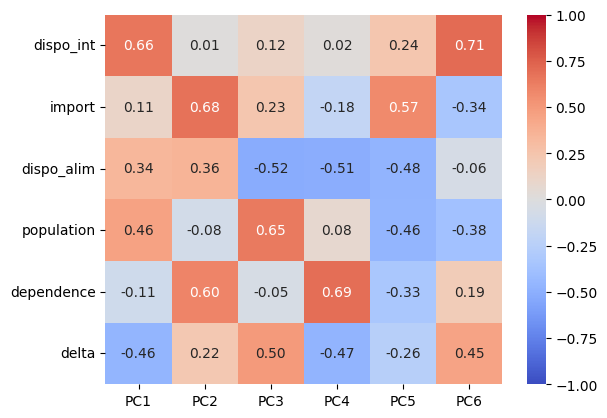

In [36]:
sns.heatmap(components, cmap="coolwarm", vmax=1, vmin=-1, annot=True, fmt=".2f")

### Plot explained variance

The explained variance ratio is pre-computed : 

In [37]:
pca.explained_variance_ratio_

array([0.35315778, 0.28280773, 0.18186013, 0.11229817, 0.05284052,
       0.01703566])

We can plot it : 

<Axes: xlabel='None'>

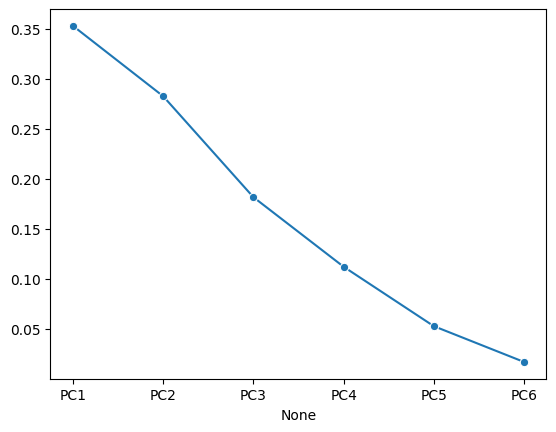

In [38]:
sns.lineplot(y=pca.explained_variance_ratio_, x=components.columns, marker="o")

A better feature is the cumulative variance : 

In [39]:
cum_var = pca.explained_variance_ratio_.cumsum()
cum_var

array([0.35315778, 0.63596551, 0.81782564, 0.93012381, 0.98296434,
       1.        ])

We can plot it : 

<Axes: >

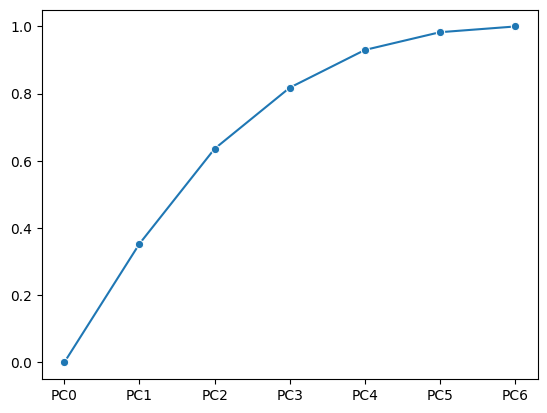

In [40]:
x = ["PC0"] + components.columns.tolist()
y = [0] + cum_var.tolist()
sns.lineplot(y=y, x=x, marker="o")

### Correlation graph

In [41]:
def correlation_graph(
    X_scaled,
    pca,
    dim: list = [0, 1],
):
    """Affiche le graphe des correlations

    Positional arguments :
        X_scaled : DataFrame | np.array : le dataset scaled
        pca : PCA : l'objet PCA déjà fitté

    Optional arguments :
        dim : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    """

    # Extrait x et y
    x, y = dim

    # features
    features = X_scaled.columns

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):
        # Les flèches
        ax.arrow(
            0,
            0,
            pca.components_[x, i],
            pca.components_[y, i],
            head_width=0.07,
            head_length=0.07,
            width=0.02,
        )

        # Les labels
        plt.text(
            pca.components_[x, i] + 0.05,
            pca.components_[y, i] + 0.05,
            features[i],
        )

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color="grey", ls="--")
    plt.plot([0, 0], [-1, 1], color="grey", ls="--")

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel(
        "F{} ({}%)".format(x + 1, round(100 * pca.explained_variance_ratio_[x], 1))
    )
    plt.ylabel(
        "F{} ({}%)".format(y + 1, round(100 * pca.explained_variance_ratio_[y], 1))
    )

    # title
    plt.title("Cercle des corrélations (F{} et F{})".format(x + 1, y + 1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis("equal")
    plt.show(block=False)

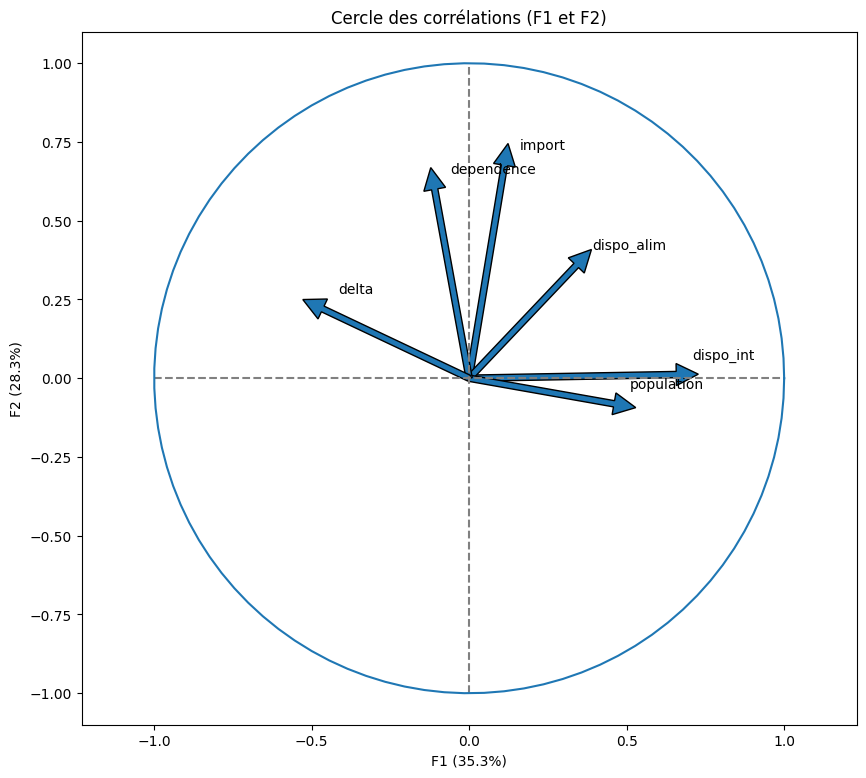

In [42]:
correlation_graph(
    X_scaled,
    pca,
    dim=[0, 1],
)

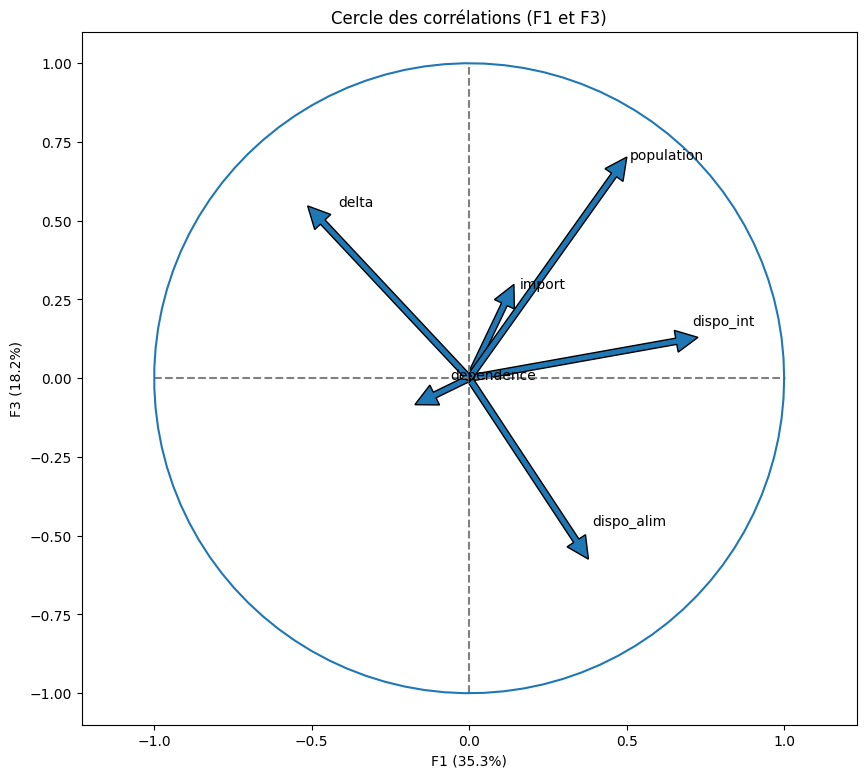

In [43]:
correlation_graph(
    X_scaled,
    pca,
    dim=[0, 2],
)

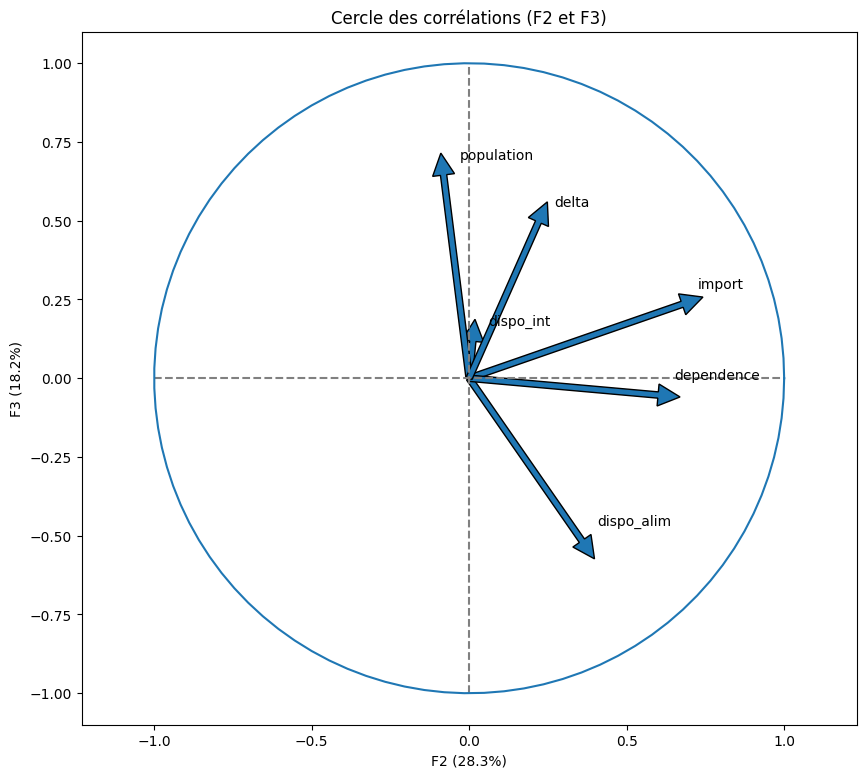

In [44]:
correlation_graph(
    X_scaled,
    pca,
    dim=[1, 2],
)

### Factorial planes

In [45]:
def factorial_planes(
    X_,
    pca,
    dim,
    labels: list = None,
    clusters: list = None,
    figsize: list = [12, 10],
    fontsize=14,
):
    """Affiche les plans factoriels"""

    x, y = dim

    dtypes = (pd.DataFrame, np.ndarray, pd.Series, list, tuple, set)
    if not isinstance(labels, dtypes):
        labels = []
    if not isinstance(clusters, dtypes):
        clusters = []

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    if len(clusters):
        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=clusters)
    else:
        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y])

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    v1 = str(round(100 * pca.explained_variance_ratio_[x])) + " %"
    v2 = str(round(100 * pca.explained_variance_ratio_[y])) + " %"

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f"F{x+1} {v1}")
    ax.set_ylabel(f"F{y+1} {v2}")

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color="grey", alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color="grey", alpha=0.8)

    # Affichage des labels des points
    if len(labels):
        for i, (_x, _y) in enumerate(X_[:, [x, y]]):
            plt.text(
                _x, _y + 0.05, labels[i], fontsize=fontsize, ha="center", va="center"
            )

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

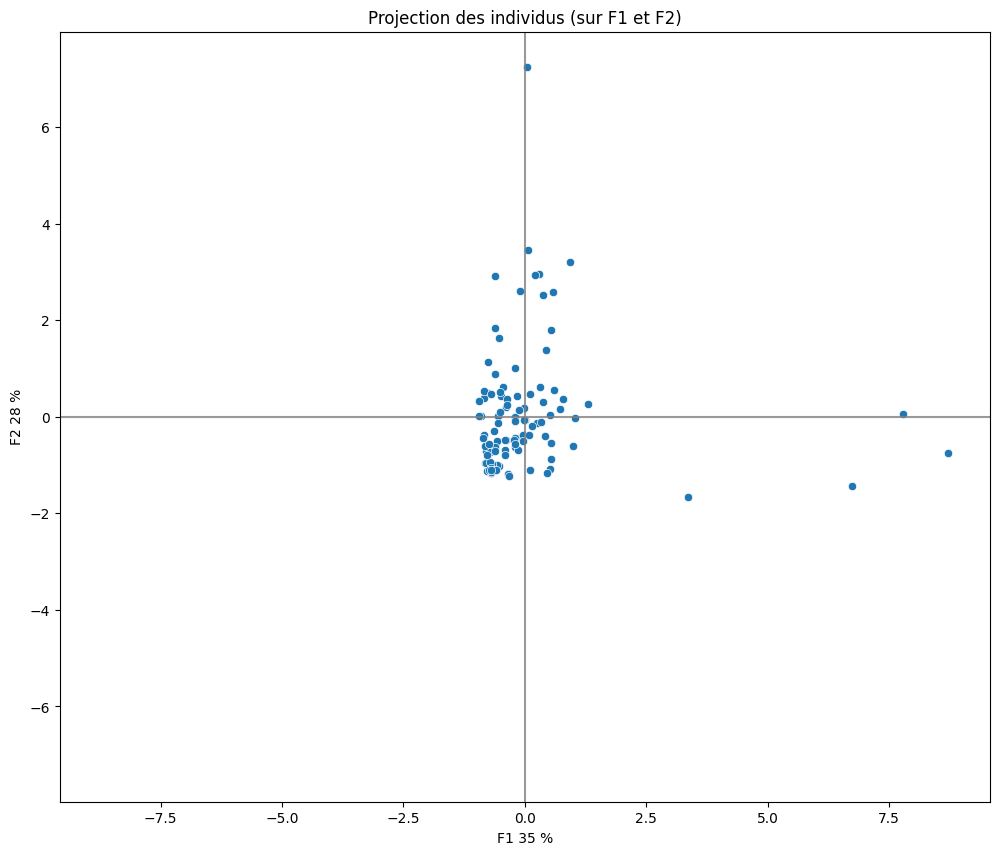

In [46]:
factorial_planes(X_proj.values, pca, [0, 1])

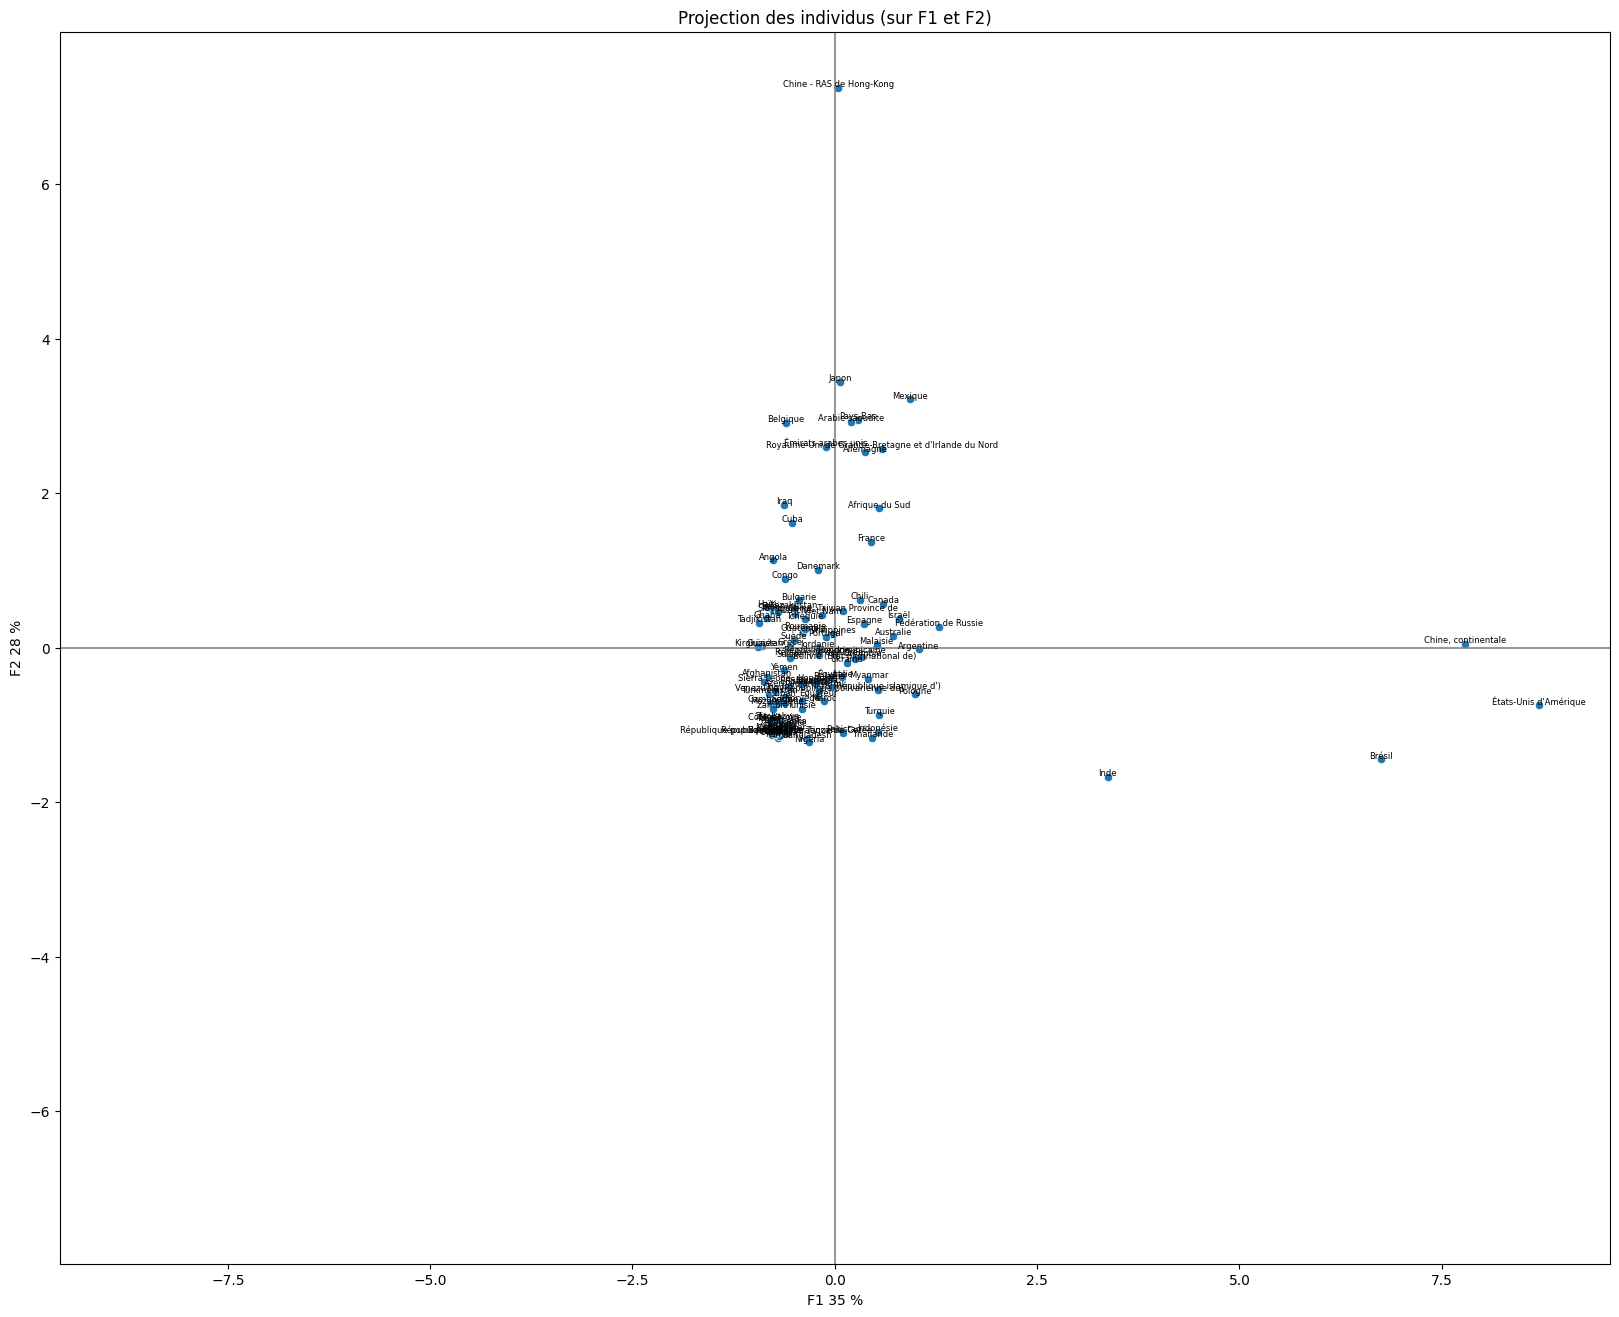

In [47]:
factorial_planes(
    X_proj.values, pca, [0, 1], labels=df.zone.values, figsize=(20, 16), fontsize=6
)

## Kmeans

### First Naive Clustering

Initialize the Kmeans model with arbitrary number of clusters:

In [48]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans

KMeans(n_clusters=6, random_state=42)

Fit the Kmeans model to the data:

In [49]:
kmeans.fit(X_scaled)
kmeans

KMeans(n_clusters=6, random_state=42)

In [50]:
labels = kmeans.predict(X_scaled)
labels

array([4, 1, 4, 1, 1, 4, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 5, 1, 4, 4, 1, 4,
       4, 1, 1, 1, 1, 1, 1, 3, 3, 4, 1, 1, 4, 4, 1, 3, 1, 0, 1, 1, 3, 1,
       1, 1, 4, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 4, 3, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1],
      dtype=int32)

Use alphanumerical labels for the clusters:

In [51]:
labels_values = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
    8: "I",
    9: "J",
}

labels = [labels_values[l] for l in labels]
labels[:10]

['E', 'B', 'E', 'B', 'B', 'E', 'B', 'B', 'C', 'E']

Create a copy of the original dataset and add labels:

In [52]:
_df = df.copy()
_df["labels"] = labels
_df

,zone,dispo_int,import,dispo_alim,population,dependence,delta,labels
0,Afghanistan,57.0,29.0,5.0,36296000,0.508772,29.0,E
1,Algérie,277.0,2.0,22.0,41389000,0.007220,2.0,B
2,Angola,319.0,277.0,35.0,29816000,0.868339,277.0,E
3,Argentine,1962.0,8.0,182.0,43937000,0.004077,-199.0,B
4,Australie,1171.0,16.0,192.0,24584000,0.013664,-26.0,B
...,...,...,...,...,...,...,...,...
104,Yémen,246.0,78.0,30.0,27834000,0.317073,78.0,B
105,Zambie,60.0,12.0,11.0,16853000,0.200000,11.0,B
106,Belgique,152.0,338.0,44.0,11419000,2.223684,-318.0,E
107,Serbie,90.0,12.0,35.0,8829000,0.133333,5.0,B


What about A cluster?

In [53]:
_df.loc[_df.labels == "A"]

,zone,dispo_int,import,dispo_alim,population,dependence,delta,labels
39,Inde,3661.0,0.0,7.0,1338676000,0.0,-4.0,A


What about B cluster?

In [54]:
_df.loc[_df.labels == "B"]

,zone,dispo_int,import,dispo_alim,population,dependence,delta,labels
1,Algérie,277.0,2.0,22.0,41389000,0.007220,2.0,B
3,Argentine,1962.0,8.0,182.0,43937000,0.004077,-199.0,B
4,Australie,1171.0,16.0,192.0,24584000,0.013664,-26.0,B
6,Bangladesh,250.0,0.0,7.0,159685000,0.000000,0.0,B
7,Bolivie (État plurinational de),429.0,1.0,155.0,11192000,0.002331,0.0,B
...,...,...,...,...,...,...,...,...
103,Éthiopie,14.0,1.0,0.0,106399000,0.071429,1.0,B
104,Yémen,246.0,78.0,30.0,27834000,0.317073,78.0,B
105,Zambie,60.0,12.0,11.0,16853000,0.200000,11.0,B
107,Serbie,90.0,12.0,35.0,8829000,0.133333,5.0,B


Etc etc...

In [55]:
_df.loc[_df.labels == "C"]

,zone,dispo_int,import,dispo_alim,population,dependence,delta,labels
8,Brésil,9982.0,3.0,204.0,207833000,0.000301,-4220.0,C
99,États-Unis d'Amérique,18266.0,123.0,219.0,325084000,0.006734,-3569.0,C


In [56]:
_df.loc[_df.labels == "D"]

,zone,dispo_int,import,dispo_alim,population,dependence,delta,labels
29,France,1573.0,506.0,92.0,64842000,0.321678,5.0,D
30,Allemagne,1739.0,842.0,71.0,82658000,0.484186,196.0,D
37,Chine - RAS de Hong-Kong,280.0,907.0,210.0,7306000,3.239286,244.0,D
42,Iraq,566.0,470.0,52.0,37552000,0.830389,470.0,D
47,Japon,2415.0,1069.0,67.0,127502000,0.442650,1059.0,D
59,Mexique,4219.0,972.0,123.0,124777000,0.230386,963.0,D
63,Pays-Bas,372.0,608.0,70.0,17021000,1.634409,-810.0,D
79,Arabie saoudite,1435.0,722.0,151.0,33101000,0.503136,712.0,D
83,Afrique du Sud,2118.0,514.0,143.0,57009000,0.242682,451.0,D
95,Émirats arabes unis,412.0,433.0,147.0,9487000,1.050971,339.0,D


In [57]:
_df.loc[_df.labels == "E"]

,zone,dispo_int,import,dispo_alim,population,dependence,delta,labels
0,Afghanistan,57.0,29.0,5.0,36296000,0.508772,29.0,E
2,Angola,319.0,277.0,35.0,29816000,0.868339,277.0,E
5,Autriche,173.0,110.0,65.0,8819000,0.635838,32.0,E
9,Bulgarie,157.0,108.0,81.0,7102000,0.687898,63.0,E
18,Congo,110.0,104.0,72.0,5110000,0.945455,104.0,E
19,Cuba,342.0,312.0,82.0,11339000,0.912281,312.0,E
21,Bénin,161.0,123.0,37.0,11175000,0.763975,123.0,E
22,Danemark,167.0,133.0,112.0,5732000,0.796407,-6.0,E
31,Ghana,211.0,151.0,16.0,29121000,0.715640,151.0,E
34,Guinée,50.0,37.0,14.0,12067000,0.740000,37.0,E


In [58]:
_df.loc[_df.labels == "F"]

,zone,dispo_int,import,dispo_alim,population,dependence,delta,labels
16,"Chine, continentale",18161.0,452.0,59.0,1421021000,0.024888,-124.0,F


Build a boxplot for each cluster:

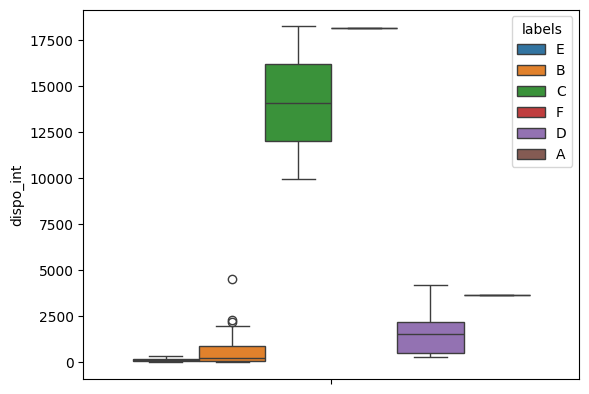

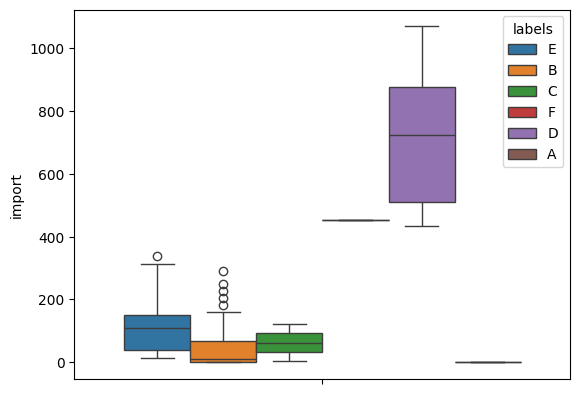

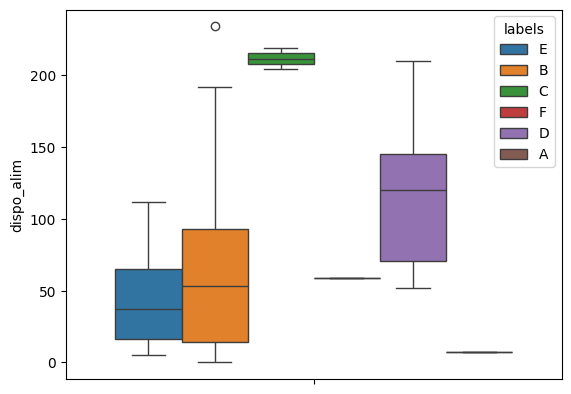

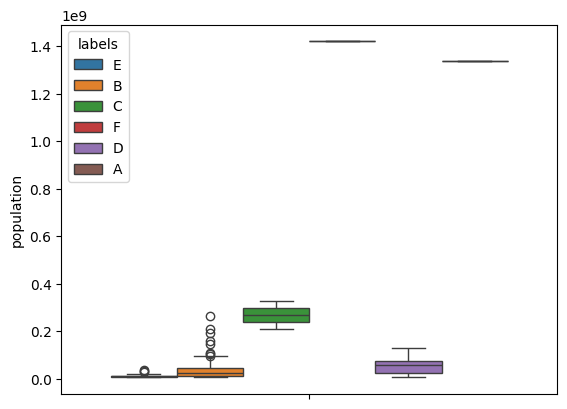

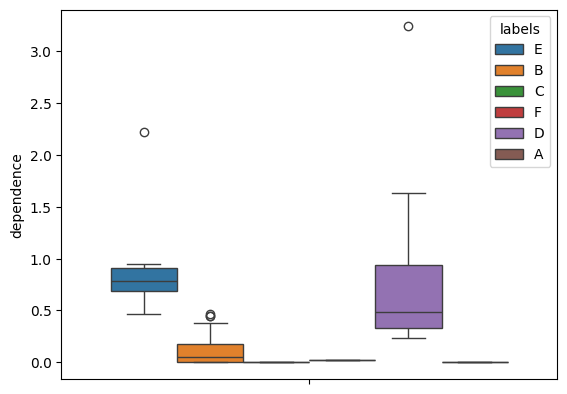

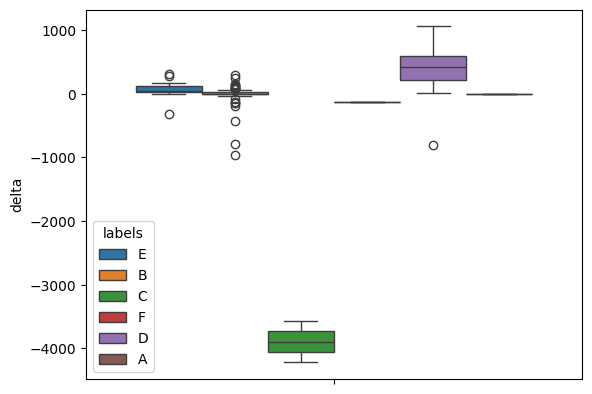

In [59]:
for col in _df.select_dtypes(include="number").columns:
    sns.boxplot(data=_df, y=col, hue="labels")
    plt.show()

Same but with plotly:

In [60]:
for col in _df.select_dtypes(include="number").columns:
    fig = px.box(_df, y=col, color="labels")
    fig.show()

ModuleNotFoundError: No module named 'tenacity.asyncio'

### Find the best number of clusters

Compute the inertia for different number of clusters:

In [61]:
# WCSS : Within-Cluster-Sum-of-Squares

inertia_list = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    print(k, kmeans.inertia_)
    inertia_list.append(kmeans.inertia_)

2 522.8838177827712
3 330.79066667109197
4 237.146988322484
5 185.37249127267006
6 145.60692318021646
7 131.52790044646872
8 98.48988352252336
9 84.41440666399866
10 78.44564475545795


Plot the inertia for different number of clusters:

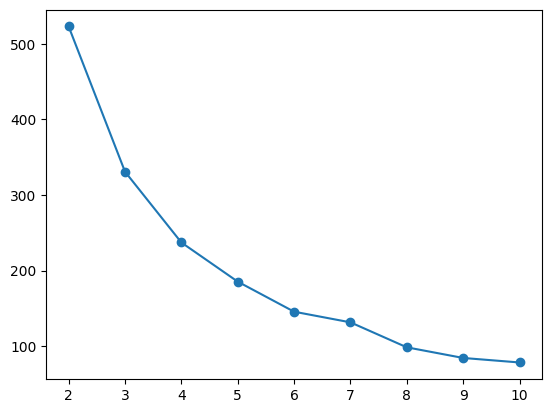

In [62]:
plt.plot(range(2, 11), inertia_list, marker="o")

Same but with davies bouldin score:

In [ ]:
# DB Score

db_list = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    db = davies_bouldin_score(X_scaled, kmeans.labels_)
    print(k, db)
    db_list.append(db)

In [ ]:
plt.plot(range(2, 11), db_list, marker="o")

Same but with silhouette score:

In [ ]:
# silhouette Score

silhouette_list = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    silhouette = davies_bouldin_score(X_scaled, kmeans.labels_)
    print(k, silhouette)
    silhouette_list.append(silhouette)

In [ ]:
plt.plot(range(2, 11), silhouette_list, marker="o")

### Use the best number of clusters

Fit the Kmeans model to the data with the best number of clusters:

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)

Have a look to labels

In [ ]:
labels

Use string values for labels:

In [ ]:
labels = [labels_values[l] for l in labels]

Update _df dataset with labels:

In [ ]:
_df = df.copy()
_df["labels"] = labels
_df

Have a look to A cluster:

In [ ]:
_df.loc[_df.labels == "A"]

Have a look to B cluster:

In [ ]:
_df.loc[_df.labels == "B"]

Etc etc...

In [ ]:
_df.loc[_df.labels == "C"]

In [ ]:
_df.loc[_df.labels == "D"]

In [ ]:
_df.loc[_df.labels == "E"]

In [ ]:
_df.loc[_df.labels == "F"]

In [ ]:
_df.loc[_df.labels == "G"]

In [ ]:
_df.loc[_df.labels == "H"]

Use boxplot to visualize the clusters:

In [ ]:
for col in _df.select_dtypes(include="number").columns:
    sns.boxplot(data=_df, y=col, hue="labels")
    plt.show()

The D cluster is interesting:

In [ ]:
_df.loc[_df.labels == "D"]

## OPTIONAL Agglomerative Clustering (Hierarchical Clustering)

Create a model with the best number of clusters:

In [ ]:
agc = AgglomerativeClustering(n_clusters=6)
agc

Fit the model to the data:

In [ ]:
agc.fit(X_scaled)

Have a look to labels : 

In [ ]:
agc_class = agc.labels_
agc_class[:100]

Use string values for labels:

In [ ]:
agc_class = [labels_values[l] for l in agc_class]
agc_class

Update _df dataset with new labels:

In [ ]:
_df["labels"] = agc_class
_df

Have a look to A cluster:

In [ ]:
_df.loc[_df.labels == "A"]

Have a look to B cluster:

In [ ]:
_df.loc[_df.labels == "B"]

Etc etc...

In [ ]:
_df.loc[_df.labels == "C"]

In [ ]:
_df.loc[_df.labels == "D"]

In [ ]:
_df.loc[_df.labels == "E"]

In [ ]:
_df.loc[_df.labels == "F"]

Use Plotly to visualize the clusters:

In [ ]:
for col in _df.select_dtypes(include="number").columns:
    fig = px.box(_df, y=col, color="labels")
    fig.show()

Plot the dendrogram

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlabel("sample index")
plt.ylabel("distance")
z = linkage(X_scaled, method="ward")
dendrogram(
    z,
    leaf_rotation=90,
    p=5,
    color_threshold=10,
    leaf_font_size=10,
    truncate_mode="level",
)
plt.tight_layout()